# Problem 1 - Convolutional Neural Networks Architectures

## 1.1

**Answer:**

Layer | Output Size | Strides | Padding | Weight | Biases | Parameters (Weight + Bias)
:-----:|:----------:|:---:|:---------:|:-----:|:---:|:---:
Input | 227\*227\*3 | - | - | 0 | 0 | 0
Conv-1 | 55\*55\*96 | 4| 0 | 11 x 11 x 3 x 96 = 34,848 | 96 | 34,944
MaxPool-1 | 27\*27\*96 | 2 | 0 | 0 | 0 | 0
Conv-2 | 27\*27\*256 | 1 | 2 | 5 x 5 x 48 x 256 = 307,200 | 256 | 307,456
MaxPool-2 | 13\*13\*256 | 2 | 0 | 0 | 0 | 0
Conv-3 | 13\*13\*384 | 1| 1 | 3 x 3 x 256 x 384 = 884,736 | 384 | 885,120
Conv-4 | 13\*13\*384 | 1 | 1 | 3 x 3 x 192 x 384 = 663,552 | 384 | 663,936
Conv-5 | 13\*13\*256 | 1 | 1 | 3 x 3 x 192 x 256 = 442,368 | 256 | 442,624
MaxPool-3 | 6\*6\*256 | 2 | 0 | 0 | 0 | 0
FC-1 | 4096\*1 | - | - | 6 x 6 x 256 x 4096 = 37,748,736 | 4096 | 37,752,832
FC-2 | 4096\*1 | - | - | 4096 x 4096 = 16,777,216| 4096 | 16,781,312
FC-3 | 1000\*1 | - | - | 4096 x 1000 = 4,096,000 | 1000 | 4,097,000
Output | 1000\*1 | - | - | 0 | 0 | 0
**Total** | | | | | | **60,965,224**



## 1.2

**Answer:**

Layer | Number of Activations (Momery) | Parameters (Compute)
:-----:|:----------:|:---:
Input | 224\*224\*3 = 150.5K | 0
CONV3-64 | 224\*224\*64 = 3.2M | (3\*3\*3)\*64 = 1,728
CONV3-64 | 224\*224\*64 = 3.2M | (3\*3\*64)\*64 = 36,864
POOL2 |  112\*112\*64 = 800K | 0
CONV3-128 | 112\*112\*128 = 1.6M | (3\*3\*64)\*128 = 73,728
CONV3-128 | 112\*112\*128 = 1.6M | (3\*3\*128)\*128 = 147,456
POOL2 |  56\*56\*128 = 401K | 0
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*128)\*256 = 294,912
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*256)\*256 = 589,824
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*256)\*256 = 589,824
CONV3-256 | 56\*56\*256 = 802.8K | (3\*3\*256)\*256 = 589,824
POOL2 | 28\*28\*256 = 200.7K| 0
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*256)\*512 = 1,179,648
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*512)\*512 = 2359296
CONV3-512 | 28\*28\*512 = 400K | (3\*3\*512)\*512 = 2359296
CONV3-512 | 28\*28\*512 = 401K | (3\*3\*512)\*512 = 2359296
POOL2 | 14\*14\*512 = 100.4K | 0
CONV3-512 | 14\*14\*512 = 100.4K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 14\*14\*512 = 100.4K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 14\*14\*512 = 100.4K | (3\*3\*512)\*512 = 2,359,296
CONV3-512 | 14\*14\*512 = 100.4K | (3\*3\*512)\*512 = 2,359,296
POOL2 | 7\*7\*512 = 25,088 | 0
FC | 4096 | 25,088*4096 = 102,760,448
FC | 4096 | 4096*4096 = 16,777,216
FC | 1000 | 4096*1000 = 4,096,000
**Total** | **16,508,888** | **143,632,544**



## 1.3

**Answer:**

The receptive field of a convolution layer is the region in the input space in which a particular CNN's feature is looking at; in other words, the size of the window by which the output feature is affected.

Assuming we are not using any stride or padding in our calculations:
- The receptive field of the single convolution layer with a filder of size F x F will be F x F
- For the second convolutional layer, each unit will have a receptive field of F x F in the feature map of the first layer.
- While in the original input space, it will cover an additional pixel around the receptive fields of the first layer.
- Therefore, the receptive field for two convolutional layers with filters of size F x F will be (F + F - 1) x (F + F - 1) = 2F - 1
- Similiarily, the receptive field for three receptive fields will be 3F - 2

As such, the recursive pattern indicates that stacking N convolutional layers will therefore result in the following:
- Each of the filter size F x F has the same receptive field as 1 convolutional layer with the filter size of (NF − N + 1) × (NF − N + 1)

    → **RF = F + (N - 1)(F - 1) → (NF - N + 1)(NF - N + 1)**

To calculate the receptive field of three filters of size 5 x 5:

**RF = F + (N - 1)(F - 1)**

   = 5 + (3 - 1)(5 - 1)

   = 5 + (2 x 4)

   = 5 + 8

  = **13**


**Therefore, a stack of three 5 x 5 convolutional layers will have the same receptive field as one convolutional layer with a filter of size 13 x 13**

## 1.4

### 1.4 (a)

**Answer:**

The inception module aimes at improving the performance and efficiency of Convolutional Neural Networks.

The general idea behind designing an inception module:


- Objects in natural images might range in size and scale; hence, a network's ability to identify patterns at various scales is necessary and useful. This is addressed by the inception module which adds parallel convolutional filters at different sizes (e.g., 1 x 1, 3 x 3, 5 x 5). With the ability to capture patterns at various scales, each of these filters enables the network to comprehend the input image more thoroughly.
- A deeper network can potentially capture more complex features. Nevertheless, adding a large number of parameters by simply stacking more convolutional layers may result in overfitting and higher computing costs. Due to its parallelized nature, the inception module permits the networl's effective depth to to grow without correspondingly increasing the number of parameters.
- The network gains some degree of translation invariance when a pooling layer is included in addition to the convolutional filters. It facilitates the capture of the image's spatial hierarchy.
- As the depth of the network increases, the number of channels (or depth) in the feature maps can also increase substantially. This can lead to a computational bottleneck. The 'dimensionality reduction' version of the inception module addresses this by introducing 1 x 1 convolutions prior to the larger convolutions, such as 3 x 3 and 5 x 5. These 1x1 convolutions act as a form of "bottleneck" layer, reducing the depth of the feature maps and hence the computational cost. This is especially beneficial before expensive operations.
- After processing through different filters and the pooling layer, the outputs are concatenated along the depth dimension. As a result, information from different scales and complexities is captured in a richer feature representation.

Overall, the inception module is designed to preserve computation efficiency, capture multi-scale characteristics, and supply a more diverse and rich set of feature maps for the network's subsequent layers.

### 1.4 (b)

**Answer:**

- Naive version:

  - 1x1 convolutions (128): 32 x 32 x 128
  - 3x3 convolutions (192): 32 x 32 x 192
  - 5x5 convolutions (96): 32 x 32 x 96
  - 3x3 max pooling: 32 x 32 x 256
    - **Filter concatenation: 128 + 192 + 96 + 256 = 672 → Output: 32 x 32 x 672**

- Dimension reductions:

  - 1x1 convolutions (128): 32 x 32 x 128
  - 1x1 convolutions (128): 32 x 32 x 128
  - 3x3 convolutions (192): 32 x 32 x 192
  - 1x1 convolutions (32): 32 x 32 x 32
  - 5x5 convolutions (96): 32 x 32 x 96
  - 3x3 max pooling: 32 x 32 x 256
  - 1x1 convolutions (64): 32 x 32 x 64
    - **Filter concatenation: 128 + 192 + 96 + 64 = 480 → Output: 32 x 32 x 480**

### 1.4 (c)

**Answer:**

- Naive version:

  - 1x1 convolutions (128): 32 × 32 × 1 × 1 × 256 × 128 = 33,554,432
  - 3x3 convolutions (192): 32 × 32 × 3 × 3 × 256 × 192 = 452,984,832
  - 5x5 convolutions (96): 32 × 32 × 5 × 5 × 256 × 96 = 629,145,600
  - 3x3 max pooling: 0
    - **Total: 33,554,432 + 452,984,832 + 629,145,600 = 1,115,684,864**

- Dimension reductions:

  - 1x1 convolutions (128): 32 × 32 × 1 × 1 × 256 × 128 = 33,554,432
  - 1x1 convolutions (128): 32 × 32 × 1 × 1 × 256 × 128 = 33,554,432
  - 3x3 convolutions (192): 32 × 32 × 3 × 3 × 128 × 192 = 226,492,416
  - 1x1 convolutions (32): 32 × 32 × 1 × 1 × 256 × 32 = 8,388,608
  - 5x5 convolutions (96): 32 × 32 × 5 × 5 × 32 × 96 = 78,643,200
  - 3x3 max pooling: 0
  - 1x1 convolutions (64): 32 × 32 × 1 × 1 × 256 × 64 = 16,777,216
    - **Total: 33,554,432 + 33,554,432 + 226,492,416 + 8,388,608 + 78,643,200 + 16,777,216 = 397,410,304**

### 1.4 (d)

**Answer:**

The naive version of the inception module involves directly applying larger convolutional filters to the input, resulting in a high computation costs. This is especially evident when applying the filters directly to the input layer with depth 256, which was the primary reason for the large number of operations (in billions).

On the other hand, the dimensionality reduction version uses 1 x 1 convolutions before the 3 x 3 and 5 x 5 convolutions, which effectively reduces the depth of the feature maps. Hence, this results in a much lower computational costs when subsequently applying the larger filters, considering they are applied to reduced-dimension feature maps instead of the original depth. The 1 x 1 convolutions, while adding some computational cost, serve to compress the feature space and thus drastically reduce the cost of the subsequent larger convolutions.

From our earlier calculations, the naive version total operations was 1,115,684,864 and 397,410,304 in the dimension reduction version. By subtracting both values, we are able to save 718,274,560 in operations by using dimension reduction rather than the naive version. This indicates a significant computational saving by employing the dimensionality reduction in the inception module, reducing computational time and complexity hence making the architecture more efficient without necessarily losing its ability to capture important features or patterns. Instead, the module is designed to maintain and enahnce its capability to represent intricate data patterns while reducing computational overhead making the inception module with dimensionality reduction generally better than the naive version.




## 1.5

### 1.5 (a)

**Answer:**

- The addition of the Region Proposal Network (RPN) is the primary distinction between Fast R-CNN and Faster R-CNN, in which led to the faster detection using Faster R-CNN.
- The region proposals in Fast R-CNN were produced through the use of an external technique called Selective Search, which was computationally costly and not a component of the neural network.
- The RPN, a fully convolutional network that simultaneously predicts object limits and objectness scores at every position, was introduced by Faster R-CNN. Because the external Selective Search method is no longer necessary, region recommendations are generated directly within the neural network, greatly increasing efficiency and speed of the process.
- Additionally, Faster R-CNNs share a convolutional feature extractor for both RPN and object detection networks, increasing efficiency.

### 1.5 (b)

**Answer:**

A Region Proposal Network (RPN) is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. Its main purpose is to generate region proposals that might contain objects. The architecture of an RPN includes:
- A shared convolutional backbone, which produces feature maps from the input image.
For each sliding-window (often called an "anchor"), the RPN predicts multiple possible scales and aspect ratios.
- The RPN outputs a set of rectangular object proposals, each with an associated objectness score for its likelihood of containing an object vs. background.


### 1.5 (c)

**Answer:**

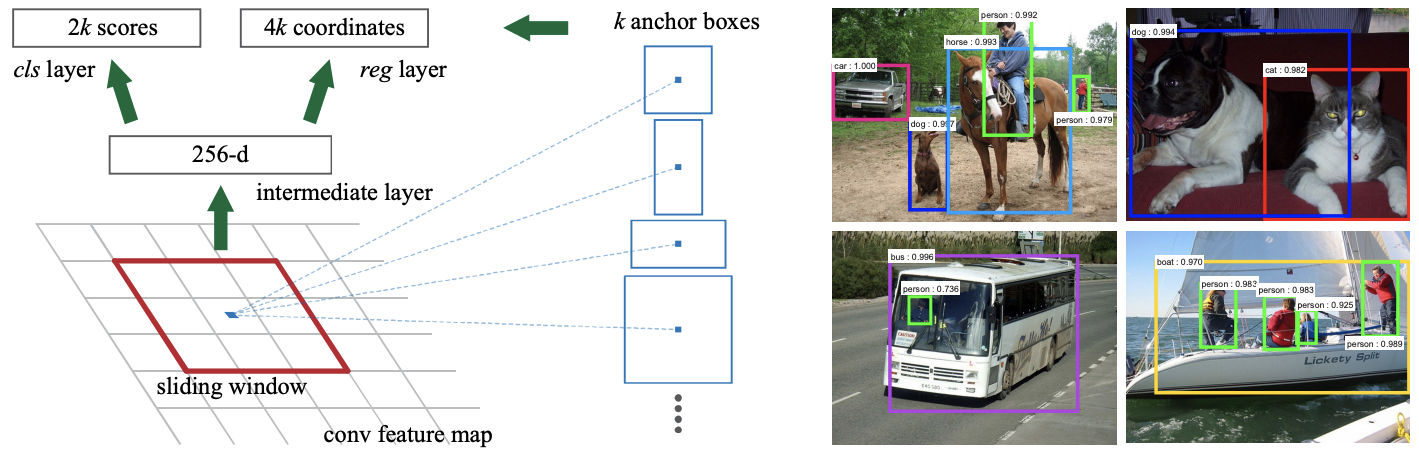
Note: you may *include* a link to the image here, or clearly name the image and include in the .zip file uploaded to Brightspace

In the provided image, the RPN operates on a feature map obtained from a prior convolutional network. This feature map is scanned using a sliding-window approach. For each position in the sliding window, the RPN predicts bounding box proposals based on multiple predefined anchor boxes of varying scales and aspect ratios. Additionally, the RPN outputs scores indicating the likelihood of an object's presence within those boxes.

- Conv Feature Map: This is the processed image data. Think of it as a compressed representation that captures the important features in the image after being passed through earlier convolutional layers of the network.
- Sliding Window: The red rectangle moving across the conv feature map represents the sliding window. It moves across the feature map to analyze local regions.
- Anchor Boxes: For each position of the sliding window, the RPN predicts bounding box adjustments for multiple anchor boxes. These are the "k anchor boxes" as shown. They come in different scales and aspect ratios, optimized for detecting objects of various shapes and sizes.
- Intermediate Layer (256-d): Before predicting the bounding box adjustments and objectness scores, the RPN processes the features from the sliding window through an intermediate layer.
- Classification (cls) and Regression (reg) Layers: The cls layer outputs the objectness scores (2k scores, where 'k' is the number of anchor boxes and '2' represents object or not-object scores). The reg layer outputs coordinates adjustments for each anchor box to better fit potential objects (4k coordinates, where 'k' is the number of anchor boxes and '4' corresponds to the coordinates x, y, width, height).

In the top right picture, there's a car and a horse. The RPN would predict several anchor boxes around these objects. Thanks to the regression layer, some of these boxes will be adjusted to closely fit the shapes of the car and the horse. The classification layer will give these fitting boxes high objectness scores, indicating a strong belief that they contain objects. So, the blue box might be an adjusted anchor that tightly encapsulates the car, while the green box might do the same for the horse. Thus, using this method, the RPN effectively proposes regions in the image that likely contain objects of interest, making the task of object detection more streamlined and efficient.

### 1.5 (d)

**Answer:**

The technique used in Faster R-CNN to reduce the number of overlapping region proposals is called Non-Maximum Suppression (NMS).

This is how NMS work:
- All the proposals are sorted based on their objectness scores.
- The proposal with the highest score is selected and kept.
- Any other proposal with significant overlap (measured using Intersection over Union, or IoU) with this top proposal is discarded.
- Steps 2 and 3 are repeated for the remaining proposals until the list is exhausted or a certain number of proposals are retained.

For example, let us take an image of a dog → The RPN might produce multiple overlapping proposals around the dog. After sorting by objectness scores, the proposal that most accurately encapsulates the dog is retained, and all other significantly overlapping proposals are discarded, ensuring that the dog is represented by a single, high-confidence proposal rather than multiple overlapping ones.